DATA SET: Par Inc., is a major manufacturer of golf equipment.

Author: MOHIT PUDNIR

In [221]:
#importing the essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [222]:
#Just for Record
#stats.ttest_ind()
#stats.levene()
#stats.shapiro()
#stats.iqr()

In [223]:
#importing the dataset
dataset = pd.read_excel("SM4-Golf.xls")
print(dataset.shape)

(40, 2)


In [224]:
dataset.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


In [225]:
dataset.isnull().values.any()

False

In [226]:
#Observation
#1. Data looks clean, there is no missing values.

In [227]:
dataset.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


In [228]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
Current    40 non-null int64
New        40 non-null int64
dtypes: int64(2)
memory usage: 720.0 bytes


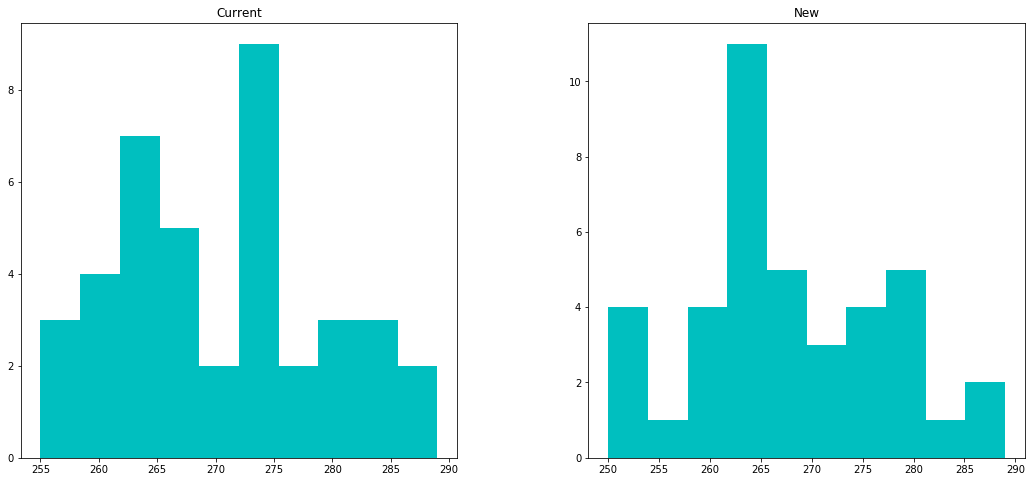

In [229]:
dataset.hist(figsize=(18,8),color="c",grid=False)
plt.show()

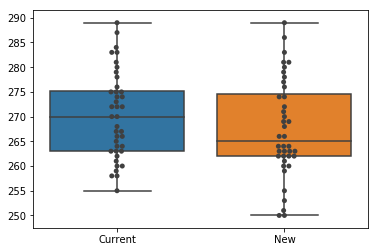

In [230]:
sns.boxplot(data=dataset, order=["Current", "New"])
sns.swarmplot(data=dataset, color=".25")

In [231]:
#Observations
# 1. There are no outliers.
# 2. The range covered by new balls are almost the same as compared to Current balls, except new has min at 250 feet.
# 3. Just by looking at the descriptive statistics foreach model, we can initially conclude that New model 
#    doesn't have a longer range of distance 
#    basedon the 40 samples with a mean of 263~265 compare to 270~275 for new model.

# Lets check further

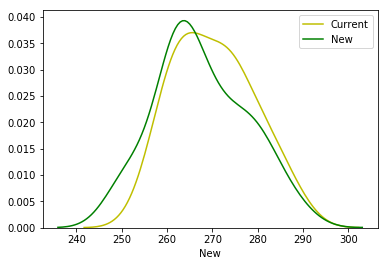

In [234]:
Current_Dist = pd.Series(dataset.Current)
New_Dist = pd.Series(dataset.New)
sns.distplot(Current_Dist, hist=False, color="y", label="Current")
sns.distplot(New_Dist, hist=False, color="g", label="New")

In [235]:
#Observations
# Distribution plot indicate not much visual difference between trajectory distance distribution of both New and Current.

ASSUMPTIONS:
1. To test further hypothesis, we set α at .05 and our rejection criteria is Reject Ho and
accept Ha if F > Fc or P < α (.05) (1 - 0.95). 
2. Since hypothesis test done thru statistic tools doesn’t indicate Fc, we will use the P-value approach.
3. Shapiro test is the test of NORMALITY
4. Levene test is used to assess the quality of varience.

# Performing T-Test for 2 independent variables

In [236]:
#Current_Dist = np.genfromint(dataset.Current,  delimiter=",")
#New_Dist = np.genfromint(dataset.New,  delimiter=",")

from scipy.stats import ttest_ind
print(Current_Dist)
print("New_Dist data :-\n")
print(New_Dist)
Current_Dist_mean = np.mean(Current_Dist)
New_Dist_mean = np.mean(New_Dist)

print("Current_Dist mean value:",Current_Dist_mean)
print("New_Dist mean value:",New_Dist_mean)

Current_Dist_std = np.std(Current_Dist)
New_Dist_std = np.std(New_Dist)

print("Current_Dist std value:",Current_Dist_std)
print("New_Dist std value:",New_Dist_std)

ttest,pval = ttest_ind(Current_Dist,New_Dist)
print("p-value",pval)

if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

0     264
1     261
2     267
3     272
4     258
5     283
6     258
7     266
8     259
9     270
10    263
11    264
12    284
13    263
14    260
15    283
16    255
17    272
18    266
19    268
20    270
21    287
22    289
23    280
24    272
25    275
26    265
27    260
28    278
29    275
30    281
31    274
32    273
33    263
34    275
35    267
36    279
37    274
38    276
39    262
Name: Current, dtype: int64
New_Dist data :-

0     277
1     269
2     263
3     266
4     262
5     251
6     262
7     289
8     286
9     264
10    274
11    266
12    262
13    271
14    260
15    281
16    250
17    263
18    278
19    264
20    272
21    259
22    264
23    280
24    274
25    281
26    276
27    269
28    268
29    262
30    283
31    250
32    253
33    260
34    270
35    263
36    261
37    255
38    263
39    279
Name: New, dtype: int64
Current_Dist mean value: 270.275
New_Dist mean value: 267.5
Current_Dist std value: 8.642880017679293
New_Dist std value: 9.772410

Conclusion: 
1. P-VALUE is .187 which is greater than .05
2. Hence, We accept the NULL hypothesis.

# Shapiro and Lavene Test

In [237]:
## Shapiro-Wilk Test for CURRENT BALLS
from scipy.stats import shapiro
# generate univariate observations
data = dataset.Current
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (Accept H0))')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.971, p=0.379
Sample looks Gaussian (Accept H0))


In [238]:
## Shapiro-Wilk Test for NEW BALLS
from scipy.stats import shapiro
# generate univariate observations
data = dataset.New
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (Accept H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.968, p=0.306
Sample looks Gaussian (Accept H0)


###################################################

## Conclusion BY SHAPIRO TEST #####
1. We can infer that P-VALUE > Alpha so Null hypothesis applies. SO, test dataset does not significantly deviate from normal.
2. NOTE: Alpha is the level of Significiance/probality Value

In [239]:
## Levene variance test
from scipy.stats import levene
stat, p = levene(dataset.Current, dataset.New)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Sample has homogenity (Accept H0)')
else:
	print('Sample does not has homoginity (reject H0)')

Statistics=0.255, p=0.615
Sample has homogenity (Accept H0)


## Conclusion BY LEVENE TEST
1. As the p-VALUE > Alpha,we can infer that both the Current & New Ball distance data shows the homoginity.
2. NOTE: Alpha is the level of Significiance/probality Value

######################################################################################
######################################################################################

# POOLED STANDARD DEVIATION

In [240]:
from numpy import std, mean, sqrt

#correct if the population S.D. is expected to be equal for the two groups.
def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2

In [241]:
#dummy data
x = np.array(dataset.Current)
y = np.array(dataset.New)

In [242]:
#correct only if nx=ny
#d = (mean(x) - mean(y)) / sqrt((std(x, ddof=1) ** 2 + std(y, ddof=1) ** 2) / 2.0)
d = sqrt((std(x, ddof=1) ** 2 + std(y, ddof=1) ** 2) / 2.0)
e = (mean(x) - mean(y))/d
print ("Pooled Standard Deviation = " + str(d))
if (len(x) != len(y)):
    print("The first method is incorrect because nx is not equal to ny.")


Pooled Standard Deviation = 9.342469200871404


# Effect Size

In [243]:
print("Effect size = "+ str(e))

Effect size = 0.2970306821820877


In [244]:
#CONCLUSION:
#   1. Pooled SD = 9.34, which is high, but the effect size is 0.29.


# POWER TEST

In [245]:
# estimate sample size via power analysis
from statsmodels.stats.power import TTestIndPower
# parameters
power = 0.8
effect = 0.29
alpha = 0.05
# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.3f' % result)

Sample Size: 187.621


# INFERENCE

According to the Power of TEST:

NOTE: If we would have around 187 samples instead of 40 we would have done better.
1. By all the above analysis we have conculed that the test will ACCEPT THE NULL HYPOTHESIS(H0 is true).
2. Although we concluded to "ACCEPT" Null Hypothesis in our analysis above, the company Par Inc has proposed to use the new balls, hence STATE of Nature in real scenario is "NULL False" or Type II error(b). Power of test is 1-b, Power of our test is 95%. And by our confidence intervals, we can say that there is no significance difference between the driving distances of Current Model and New Model.
3. We would now have to recommend  Par, Inc. : they should NOT launch this new product because the new model is not an improvement in distance compared to the old model. Our recommendation for the company (Par, Inc.) is to continue with further thier research to improved cut-resistant and quality of balls. However, next time besides testing the driving distance, they should also consider other factors like quality, design, availability of suppliers and cost per piece. This is import before lauching the product in market and doing full flegded production.